# Tarea
Vamos a hacer un ejercicio prácticando lo que vimos ayer en machine learning y regresion lineal con un conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# http://lib.stat.cmu.edu/datasets/pollution
names=["PREC","JANT","JULT","OVR65","POPN","EDUC","HOUS","DENS",
       "NONW","WWDRK","POOR","HC","NOX","SO@","HUMID","MORT"]
data=pd.read_csv("pollution.txt",skiprows=21,names=names, delimiter="\s+")

In [3]:
data.head()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


In [4]:
# 1. Separando en variables dependientes e independientes...
X=data.drop(columns=["MORT"]) # Variables predictoras
y=data["MORT"] # Variable a predecir

In [5]:
# Aplicando regresión lineal con statmodels
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MORT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     9.542
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           2.19e-09
Time:                        19:54:38   Log-Likelihood:                -289.03
No. Observations:                  60   AIC:                             610.1
Df Residuals:                      44   BIC:                             643.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1763.9814    437.327      4.034      0.0

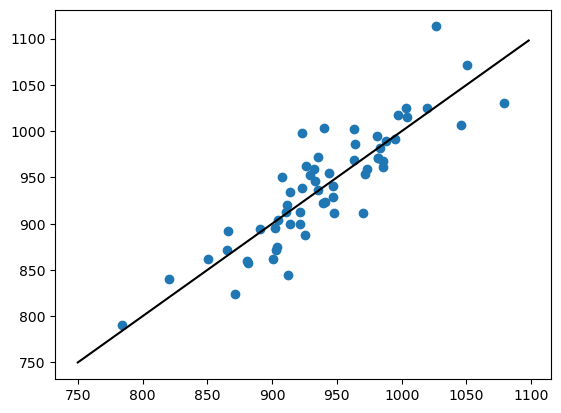

In [6]:
plt.scatter(predictions,y)
plt.plot(np.arange(750,1100,6),np.arange(750,1100,6),c="k")
plt.show()

In [7]:
# Machine Learning
# Segmentar el conjunto de datos en Entrenamiento y Prueba (Dividir)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10860007)

In [8]:
# Defininiendo el modelo, es "regresión lineal múltiple"
# Cargamos el modelo
### Llamamos la librería de machine learning de regresiones lineales
from sklearn import linear_model 
mortalidad = linear_model.LinearRegression() #Este es el modelo y se llama "mortalidad"
mortalidad.fit(X_train,y_train)

LinearRegression()

In [9]:
# Predicciones
y_predict=mortalidad.predict(X)
y_predict_train=mortalidad.predict(X_train)
y_predict_test=mortalidad.predict(X_test)

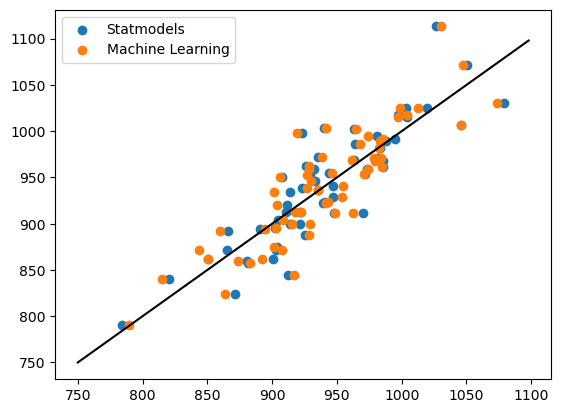

In [10]:
plt.scatter(predictions,y, label="Statmodels")
plt.scatter(y_predict,y, label="Machine Learning")
plt.plot(np.arange(750,1100,6),np.arange(750,1100,6),c="k")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score
RMSE_full=np.sqrt(mean_squared_error(y,y_predict))
MAPE_full=mean_absolute_percentage_error(y,y_predict)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_predict_train))
MAPE_train=mean_absolute_percentage_error(y_train,y_predict_train)
RMSE_test=np.sqrt(mean_squared_error(y_test,y_predict_test))
MAPE_test=mean_absolute_percentage_error(y_test,y_predict_test)

In [12]:
print("RMSE_full =",RMSE_full)
print("MAPE_full =",MAPE_full)
print("RMSE_train =",RMSE_train)
print("MAPE_train =",MAPE_train)
print("RMSE_test =",RMSE_test)
print("MAPE_test =",MAPE_test)

RMSE_full = 30.429547023274544
MAPE_full = 0.025873855879906933
RMSE_train = 31.08605758747002
MAPE_train = 0.025735719065204776
RMSE_test = 26.402752654461313
MAPE_test = 0.02665663116321915


In [13]:
# Rescatando los coeficientes del modelo
importancias=mortalidad.coef_

In [14]:
importancias

array([ 0.00000000e+00,  2.19343598e+00, -2.27209339e+00, -3.26215481e+00,
       -1.04945098e+01, -1.08546001e+02, -2.16043797e+01, -3.56545950e-01,
        1.67720514e-03,  4.43477486e+00, -2.47636890e-01, -1.64064585e-01,
       -5.34554252e-01,  1.13957182e+00,  7.09986387e-02,  6.61044689e-01])

In [15]:
# Importancia de las características
for i, j in enumerate(importancias):
    print("La caracteristica {}".format(i),"tiene una importancia de {}".format(j))

La caracteristica 0 tiene una importancia de 0.0
La caracteristica 1 tiene una importancia de 2.193435975144153
La caracteristica 2 tiene una importancia de -2.2720933930282197
La caracteristica 3 tiene una importancia de -3.2621548139984933
La caracteristica 4 tiene una importancia de -10.49450975868837
La caracteristica 5 tiene una importancia de -108.54600107058926
La caracteristica 6 tiene una importancia de -21.604379688504842
La caracteristica 7 tiene una importancia de -0.35654594990136534
La caracteristica 8 tiene una importancia de 0.0016772051412440993
La caracteristica 9 tiene una importancia de 4.43477485758474
La caracteristica 10 tiene una importancia de -0.24763688991586955
La caracteristica 11 tiene una importancia de -0.16406458528592957
La caracteristica 12 tiene una importancia de -0.5345542520482058
La caracteristica 13 tiene una importancia de 1.1395718185322699
La caracteristica 14 tiene una importancia de 0.07099863868840112
La caracteristica 15 tiene una importa

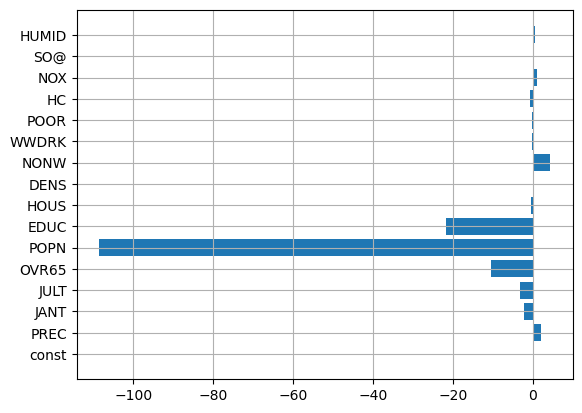

In [16]:
plt.barh([x for x in range(len(importancias))], importancias)
plt.grid(); plt.yticks(range(len(importancias)),X.columns)
plt.show()

In [17]:
#POPN   Average household size
#EDUC   Median school years completed by those over 22
#OVR65  % of 1960 SMSA population aged 65 or older
#["POPN","EDUC","OVR65"]

In [18]:
X=X[["POPN","EDUC","OVR65","NONW"]]

In [19]:
# Machine Learning
# Segmentar el conjunto de datos en Entrenamiento y Prueba (Dividir)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10860007)

In [20]:
# Defininiendo el modelo, es "regresión lineal múltiple"
# Cargamos el modelo
### Llamamos la librería de machine learning de regresiones lineales
from sklearn import linear_model 
mortalidad = linear_model.LinearRegression() #Este es el modelo y se llama "mortalidad"
mortalidad.fit(X_train,y_train)

LinearRegression()

In [21]:
# Predicciones
y_predict=mortalidad.predict(X)
y_predict_train=mortalidad.predict(X_train)
y_predict_test=mortalidad.predict(X_test)

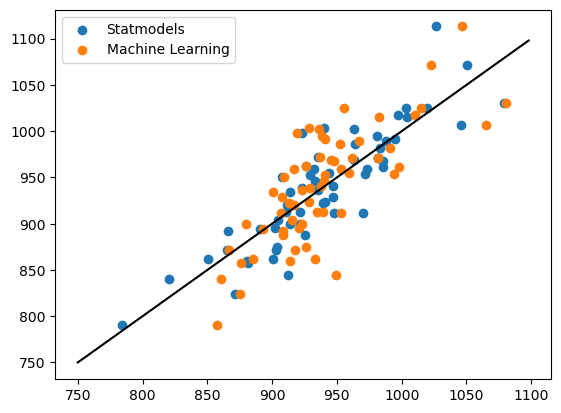

In [22]:
plt.scatter(predictions,y, label="Statmodels")
plt.scatter(y_predict,y, label="Machine Learning")
plt.plot(np.arange(750,1100,6),np.arange(750,1100,6),c="k")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score
RMSE_full=np.sqrt(mean_squared_error(y,y_predict))
MAPE_full=mean_absolute_percentage_error(y,y_predict)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_predict_train))
MAPE_train=mean_absolute_percentage_error(y_train,y_predict_train)
RMSE_test=np.sqrt(mean_squared_error(y_test,y_predict_test))
MAPE_test=mean_absolute_percentage_error(y_test,y_predict_test)

In [24]:
print("RMSE_full =",RMSE_full)
print("MAPE_full =",MAPE_full)
print("RMSE_train =",RMSE_train)
print("MAPE_train =",MAPE_train)
print("RMSE_test =",RMSE_test)
print("MAPE_test =",MAPE_test)

RMSE_full = 39.210349818222305
MAPE_full = 0.03343939940823293
RMSE_train = 39.972495399565865
MAPE_train = 0.03362706831075132
RMSE_test = 34.57563715193105
MAPE_test = 0.032375942293962096


## 16 variables
- RMSE_full = 30.429547023274544
- MAPE_full = 0.025873855879906933
- RMSE_train = 31.08605758747002
- MAPE_train = 0.025735719065204776
- RMSE_test = 26.402752654461313
- MAPE_test = 0.02665663116321915
- Con 16 variables el error promedio es de 2.6% (97.4% precisión)
## 4 variables
- RMSE_full = 39.210349818222305
- MAPE_full = 0.03343939940823293
- RMSE_train = 39.972495399565865
- MAPE_train = 0.03362706831075132
- RMSE_test = 34.57563715193105
- MAPE_test = 0.032375942293962096
- Con 4 variables el error promedio es de 3.3% (96.7% precisión)

In [25]:
97.4-96.7

0.7000000000000028

# Ridge regression and classification

In [26]:
reg1 = linear_model.Ridge(alpha=.5)
reg1.fit(X_train,y_train)
print(reg1.coef_)
print(reg1.intercept_)

[ 30.75228819 -22.23815246  10.06136354   4.72301081]
938.4462485834681


In [27]:
y_predict_ridge=reg1.predict(X)

# Lasso

In [28]:
reg2 = linear_model.Lasso(alpha=.5)
reg2.fit(X_train,y_train)
print(reg2.coef_)
print(reg2.intercept_)

[  7.883363   -23.90398009   8.35006516   4.66050544]
1047.1327651080655


In [29]:
y_predict_lasso=reg2.predict(X)

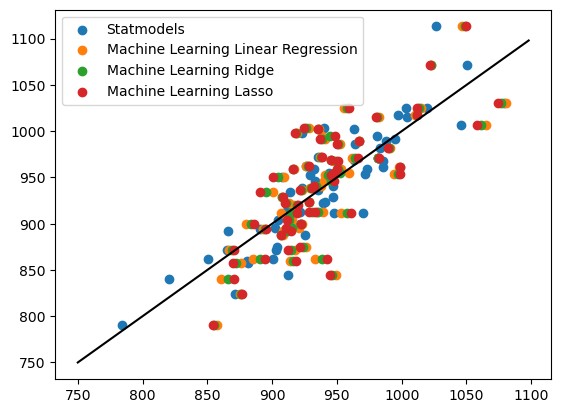

In [30]:
plt.scatter(predictions,y, label="Statmodels")
plt.scatter(y_predict,y, label="Machine Learning Linear Regression")
plt.scatter(y_predict_ridge,y, label="Machine Learning Ridge")
plt.scatter(y_predict_lasso,y, label="Machine Learning Lasso")
plt.plot(np.arange(750,1100,6),np.arange(750,1100,6),c="k")
plt.legend()
plt.show()

In [32]:
# Errores
print("MAPE_full Linear Regression =",100*mean_absolute_percentage_error(y_predict,y))
print("MAPE_full Ridge =",100*mean_absolute_percentage_error(y_predict_ridge,y))
print("MAPE_full Lasso =",100*mean_absolute_percentage_error(y_predict_lasso,y))

MAPE_full Linear Regression = 3.330274100660311
MAPE_full Ridge = 3.302728625070713
MAPE_full Lasso = 3.318452904102682
